# 1. Problem Ideation and Proposal

## The Problem Statement

- The approval of loans is a critical aspect of financial services, and understanding the factors that influence loan approval rates can help financial institutions make more informed decisions.
- Despite the availability of extensive applicant data, predicting loan approval remains a complex task due to the many variables involved.
- This project aims to develop a machine learning model that accurately predicts loan approval based on various applicant attributes.
- By analyzing temporal trends, demographic and economic patterns, income ratios, and geographical differences, we seek to uncover insights that can improve the loan approval process and enhance the fairness and efficiency of lending decisions.

# Objective
* To create a machine learning model that predicts loan approval based on various applicant attributes 

## Specific Objectives:

1. **Temporal Analysis**: How do loan approval rates change over time?
    * Data Required: `issue_d`
    * _Approach_: Perform a trend analysis using the `issue_d` column to observe changes in loan approval rates over different periods.

2. **Demographic Influence**: Are there demographic and economic patterns (e.g., `employment title`, `length`, `home ownership status`, `interest rate`) that influence loan approval rates?
    * Data Required: `emp_title`, `emp_length`, `home_ownership`
    * _Approach_: Analyze the influence of `employment title`, `employment length`, and `home ownership status` on loan approval rates.

3. **Income Analysis**: How does the ratio of applicant income to loan amount influence loan approval likelihood?
    * Data Required: `annual_inc`, `loan_amnt`
    * _Approach_: Calculate the `income-to-loan ratio` and analyze its impact on loan approval likelihood.

4. **Geographical Trends**: Are there significant differences in loan approval rates across different states?
    * Data Required: `zip_code`, `addr_state`
    * _Approach_: Analyze loan approval rates based on geographical locations using `zip_code` and `addr_state`.

# 2. Data Collection and Preparation
* Load the dataset, handle missing values, and perform initial preprocessing.

In [64]:
# Install specified version of scikit-learn to prevent conflict between fitted models and saved models.
# Conflict is due to changes in the internal representation of objects between different versions of scikit-learn during implementation
!pip install --upgrade scikit-learn==1.4.2


   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.3/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/10.6 MB 2.2 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/10.6 MB 2.1 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/10.6 MB 2.1 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/10.6 MB 2.0 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/10.6 MB 2.0 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/10.6 MB 2.0 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/10.6 MB 2.0 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/10.6 MB 2.0 MB/s eta 0:00:04
   ----------------- ---------------------- 4.7/10.6 MB 2.1 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/10.6 MB 2.1 MB/s eta 0:00:03
   ----------

  You can safely remove it manually.


In [61]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score
import joblib

In [2]:
# Load the Dataset

# Path to the CSV file
file_path = './Resources/loans.csv'

# Define data types for reading the CSV file
dtype = {
    'loan_amnt': 'float32',
    'term': 'object',
    'int_rate': 'float32',
    'grade': 'object',
    'sub_grade': 'object',
    'annual_inc': 'float32',
    'dti': 'float32',
    'fico_range_low': 'float32',
    'fico_range_high': 'float32',
    'home_ownership': 'object',
    'purpose': 'object',
    'delinq_2yrs': 'float32',
    'revol_bal': 'float32',
    'revol_util': 'float32',
    'open_acc': 'float32',
    'zip_code': 'object',
    'addr_state': 'object',
    'mort_acc': 'float32',
    'pub_rec': 'float32',
    'emp_length': 'object',
    'loan_status': 'object',
    'issue_d': 'object',
    'purpose': 'object',
    'installment': 'float32',
    'emp_title': 'object'
}

# Specify the columns of interest
columns_of_interest = [
    'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 
    'home_ownership', 'purpose', 'delinq_2yrs', 'revol_bal', 'revol_util', 'open_acc', 'zip_code', 'addr_state',
    'mort_acc', 'pub_rec', 'emp_length', 'loan_status', 'issue_d',  'purpose','installment', 'emp_title'
]

# Initialize an empty list to hold the filtered data
filtered_df_list = []

# Read the CSV file in chunks, filter each chunk, and append to the list
chunk_size = 100000  # Adjust chunk size as needed
for chunk in pd.read_csv(file_path, dtype=dtype, usecols=columns_of_interest, chunksize=chunk_size, low_memory=False):
    filtered_df_list.append(chunk)

# Concatenate all filtered chunks into a single DataFrame
df = pd.concat(filtered_df_list, ignore_index=True)

# Clear the list to free memory
del filtered_df_list

# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None) 

# Now df contains the complete filtered dataset
df.head()


loan_amnt        term   int_rate  installment grade sub_grade  \
0     3600.0   36 months  13.990000   123.029999     C        C4   
1    24700.0   36 months  11.990000   820.280029     C        C1   
2    20000.0   60 months  10.780000   432.660004     B        B4   
3    35000.0   60 months  14.850000   829.900024     C        C5   
4    10400.0   60 months  22.450001   289.910004     F        F1   

                     emp_title emp_length home_ownership  annual_inc  \
0                      leadman  10+ years       MORTGAGE     55000.0   
1                     Engineer  10+ years       MORTGAGE     65000.0   
2                 truck driver  10+ years       MORTGAGE     63000.0   
3  Information Systems Officer  10+ years       MORTGAGE    110000.0   
4          Contract Specialist    3 years       MORTGAGE    104433.0   

    issue_d loan_status             purpose zip_code addr_state        dti  \
0  Dec-2015  Fully Paid  debt_consolidation    190xx         PA   5.910000   
1  Dec-2015  Fully Paid      small_business    577xx         SD  16.059999   
2  Dec-2015  Fully Paid    home_improvement    605xx         IL  10.780000   
3  Dec-2015     Current  debt_consolidation    076xx         NJ  17.059999   
4  Dec-2015  Fully Paid      major_purchase    174xx         PA  25.370001   

   delinq_2yrs  fico_range_low  fico_range_high  open_acc  pub_rec  revol_bal  \
0          0.0           675.0            679.0       7.0      0.0     2765.0   
1          1.0           715.0            719.0      22.0      0.0    21470.0   
2          0.0           695.0            699.0       6.0      0.0     7869.0   
3          0.0           785.0            789.0      13.0      0.0     7802.0   
4          1.0           695.0            699.0      12.0      0.0    21929.0   

   revol_util  mort_acc  
0   29.700001       1.0  
1   19.200001       4.0  
2   56.200001       5.0  
3   11.600000       1.0  
4   64.500000       6.0

In [3]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   loan_amnt        float32
 1   term             object 
 2   int_rate         float32
 3   installment      float32
 4   grade            object 
 5   sub_grade        object 
 6   emp_title        object 
 7   emp_length       object 
 8   home_ownership   object 
 9   annual_inc       float32
 10  issue_d          object 
 11  loan_status      object 
 12  purpose          object 
 13  zip_code         object 
 14  addr_state       object 
 15  dti              float32
 16  delinq_2yrs      float32
 17  fico_range_low   float32
 18  fico_range_high  float32
 19  open_acc         float32
 20  pub_rec          float32
 21  revol_bal        float32
 22  revol_util       float32
 23  mort_acc         float32
dtypes: float32(13), object(11)
memory usage: 301.8+ MB


In [4]:
# summary statistics
df.describe()

loan_amnt      int_rate   installment    annual_inc           dti  \
count  2.260668e+06  2.260668e+06  2.260668e+06  2.260664e+06  2.258957e+06   
mean   1.504693e+04  1.309283e+01  4.458068e+02  7.799244e+04  1.882420e+01   
std    9.199281e+03  4.827580e+00  2.669711e+02  1.124016e+05  1.416716e+01   
min    5.000000e+02  5.310000e+00  4.930000e+00  0.000000e+00 -1.000000e+00   
25%    8.000000e+03  9.490000e+00  2.516500e+02  4.600000e+04  1.189000e+01   
50%    1.290000e+04  1.262000e+01  3.779900e+02  6.500000e+04  1.784000e+01   
75%    2.000000e+04  1.599000e+01  5.933200e+02  9.300000e+04  2.449000e+01   
max    4.000000e+04  3.099000e+01  1.719830e+03  1.100000e+08  9.990000e+02   

        delinq_2yrs  fico_range_low  fico_range_high      open_acc  \
count  2.260639e+06    2.260668e+06     2.260668e+06  2.260639e+06   
mean   3.068792e-01    6.985884e+02     7.025886e+02  1.161240e+01   
std    8.784168e-01    3.321310e+01     3.317435e+01  5.634583e+00   
min    0.000000e+00    6.100000e+02     6.140000e+02  0.000000e+00   
25%    0.000000e+00    6.750000e+02     6.790000e+02  8.000000e+00   
50%    0.000000e+00    6.900000e+02     6.940000e+02  1.100000e+01   
75%    0.000000e+00    7.150000e+02     7.190000e+02  1.400000e+01   
max    5.800000e+01    8.450000e+02     8.500000e+02  1.010000e+02   

            pub_rec     revol_bal    revol_util      mort_acc  
count  2.260639e+06  2.260668e+06  2.258866e+06  2.210638e+06  
mean   1.975278e-01  1.665845e+04  5.033770e+01  1.555382e+00  
std    5.715886e-01  2.292081e+04  2.469686e+01  1.911093e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  5.950000e+03  3.150000e+01  0.000000e+00  
50%    0.000000e+00  1.132400e+04  5.030000e+01  1.000000e+00  
75%    0.000000e+00  2.024600e+04  6.940000e+01  3.000000e+00  
max    8.600000e+01  2.904836e+06  8.923000e+02  9.400000e+01

In [5]:
# summary statistics for categorical variables
df.describe(include='object')

term    grade sub_grade emp_title emp_length home_ownership  \
count      2260668  2260668   2260668   2093699    2113761        2260668   
unique           2        7        35    512694         11              6   
top      36 months        B        C1   Teacher  10+ years       MORTGAGE   
freq       1609754   663557    145903     38824     748005        1111450   

         issue_d loan_status             purpose zip_code addr_state  
count    2260668     2260668             2260668  2260667    2260668  
unique       139           9                  14      956         51  
top     Mar-2016  Fully Paid  debt_consolidation    112xx         CA  
freq       61992     1076751             1277877    23908     314533

In [6]:
# Inspect the counts of the target variable
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

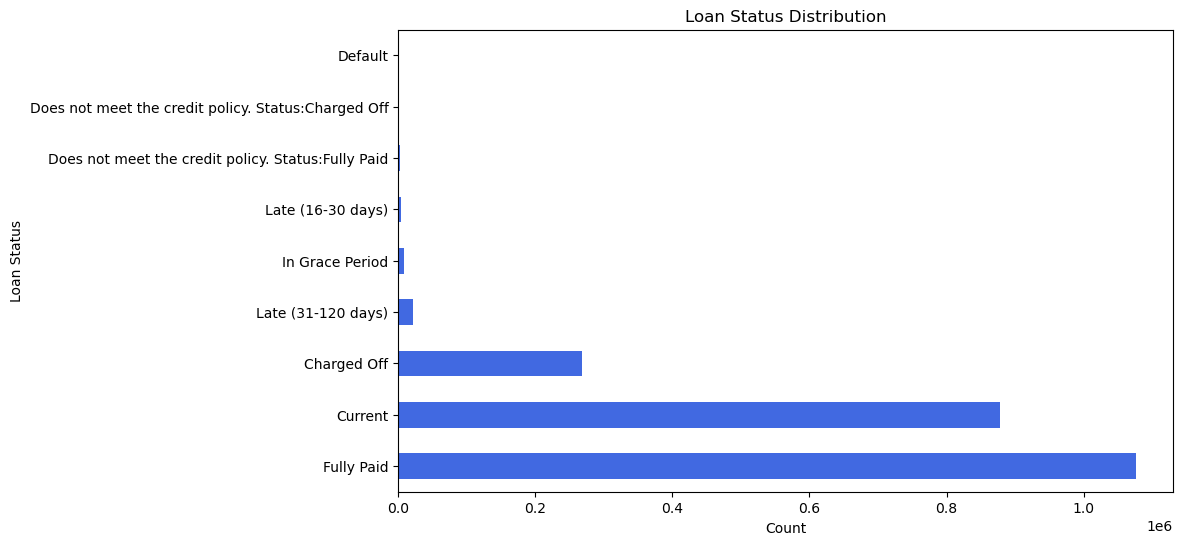

In [7]:
# Plotting the distribution of the target variable 'loan_status'
plt.figure(figsize=(10, 6))
df['loan_status'].value_counts().plot(kind='barh', color='royalblue')
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

### Transform/Update the loan_status Column:
* Convert target variable into binary format (`Paid`and `Unpaid`)

In [8]:
# Define the categories to consider as 'approved' and 'not approved'
approved_status = ['Fully Paid']
not_approved_status = ['Current', 'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period']

In [9]:
# Update 'loan_status' to 'Paid' or 'Unpaid'
df['loan_status'] = df['loan_status'].apply(
    lambda x: "Paid" if x in approved_status else ("Unpaid" if x in not_approved_status else None)
)

In [10]:
# Drop records with 'None' in 'loan_status'
df = df.dropna(subset=['loan_status'])

In [11]:
# Print the updated DataFrame and value counts
print("Updated DataFrame shape:", df.shape)
print("Value counts for 'loan_status':")
print(df['loan_status'].value_counts())


Updated DataFrame shape: (2257919, 24)
Value counts for 'loan_status':
loan_status
Unpaid    1181168
Paid      1076751
Name: count, dtype: int64


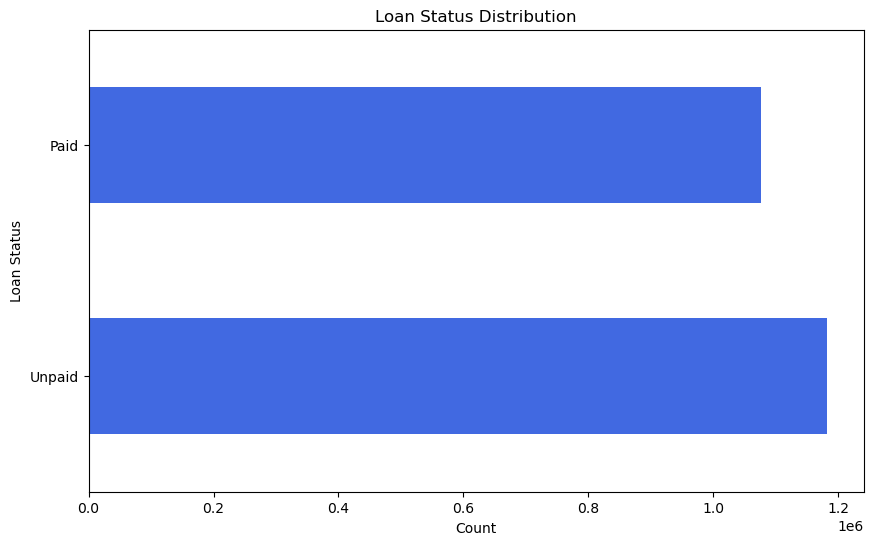

In [12]:
# Plotting the distribution of the target variable 
plt.figure(figsize=(10, 6))
df['loan_status'].value_counts().plot(kind='barh', color='royalblue')
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

emp_title     166810
emp_length    146873
zip_code           1
dti             1711
revol_util      1762
mort_acc       47281
dtype: int64


In [14]:
# Fill missing values in relevant columns
df['emp_title'] = df['emp_title'].fillna('Unknown')
df['emp_length'] = df['emp_length'].fillna('0 years')
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())


In [15]:
# Convert columns to appropriate data types
# Convert 'issue_d' to datetime with the specified format 'Mmm-YYYY'
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# Ensure 'emp_length' is a string before extracting digits and converting to float
df['emp_length'] = df['emp_length'].astype(str).str.extract('(\d+)').astype(float)


# 3. Exploratory Data Analysis (EDA)
* Explore the data to identify trends, patterns, and relationships among variables.

## 3.1 Temporal Analysis
* Analyze the trends in loan approval over time.

In [16]:
# Extract year and month from the issue date
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

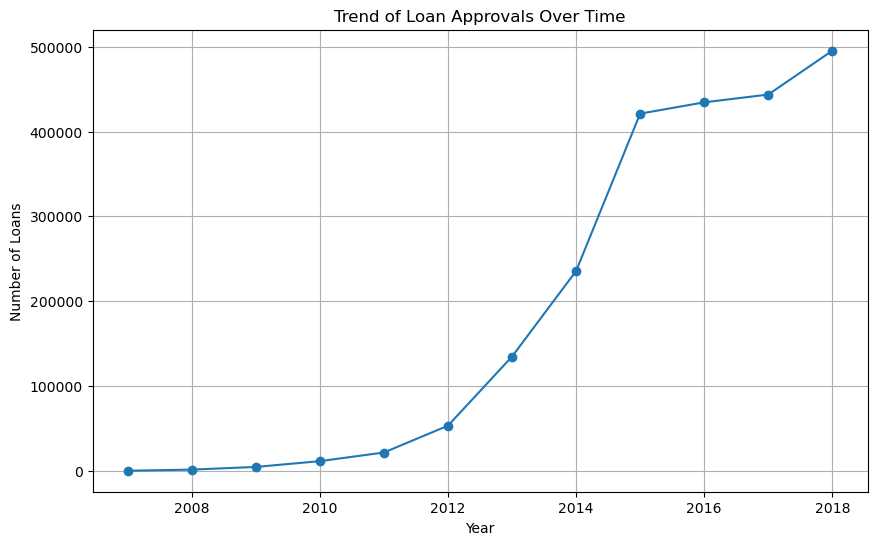

In [17]:
# Group by year and calculate the count of loan approvals
loan_trend = df.groupby('issue_year').size()

# Plot the trend of loan approvals over time
plt.figure(figsize=(10, 6))
plt.plot(loan_trend.index, loan_trend.values, marker='o')
plt.title('Trend of Loan Approvals Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.grid(True)
plt.show()

## 3.2 Demographic Influence
* Analyze the impact of demographic factors on loan approval.

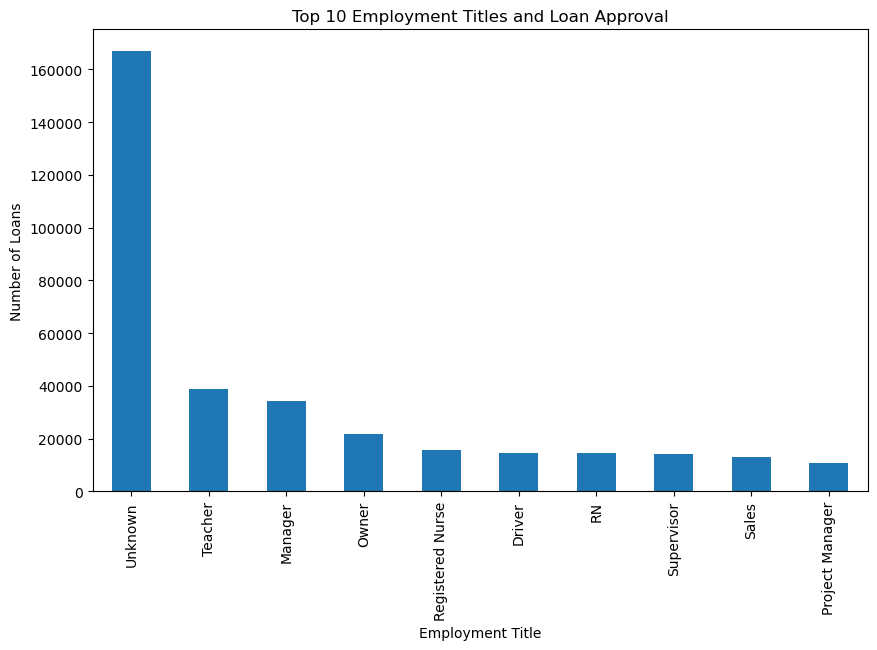

In [18]:
# Employment title and loan approval
top_emp_titles = df['emp_title'].value_counts().iloc[:10]
plt.figure(figsize=(10, 6))
top_emp_titles.plot(kind='bar')
plt.title('Loans Approved Among the Top 10 Employment Titles')
plt.xlabel('Employment Title')
plt.ylabel('Number of Loans')
plt.show()

<Figure size 1000x600 with 0 Axes>

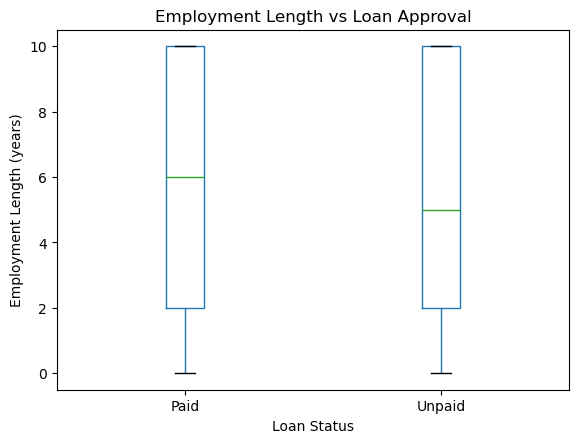

In [19]:
# Employment length and loan approval
plt.figure(figsize=(10, 6))
df.boxplot(column='emp_length', by='loan_status', grid=False)
plt.title('Employment Length vs Loan Status')
plt.suptitle('')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length (years)')
plt.show()

In [20]:
# Preprocess Home Ownership Categories

# Define the categories to keep
main_categories = ['MORTGAGE', 'RENT', 'OWN']

# Apply the mapping to the 'home_ownership' column
df['home_ownership'] = df['home_ownership'].apply(lambda x: x if x in main_categories else 'OTHER')


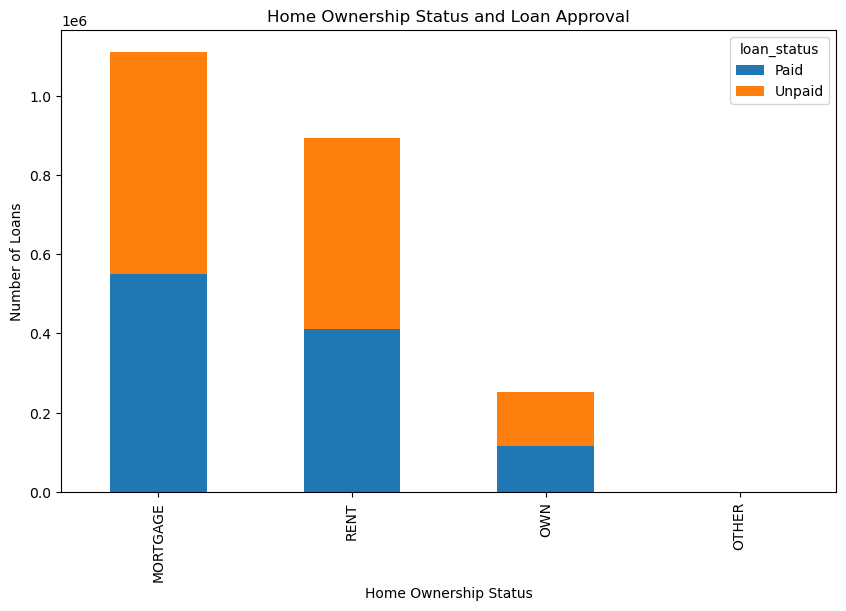

In [21]:
# Home ownership and loan approval

# Group by 'home_ownership' and 'loan_status', then calculate the size of each group
home_ownership_counts = df.groupby(['home_ownership', 'loan_status']).size().unstack()

# Calculate the total number of loans for each home ownership status and sort in descending order
home_ownership_totals = home_ownership_counts.sum(axis=1).sort_values(ascending=False)

# Reorder the home_ownership_counts dataframe according to the sorted totals
home_ownership_counts = home_ownership_counts.loc[home_ownership_totals.index]

# Plot the data
home_ownership_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Home Ownership Status and Loan Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Number of Loans')
plt.show()

## 3.3 Income Analysis
* Analyze the influence of income-to-loan ratio on loan approval likelihood.

In [22]:
# Calculate the income-to-loan ratio
df['income_to_loan_ratio'] = df['annual_inc'] / df['loan_amnt']

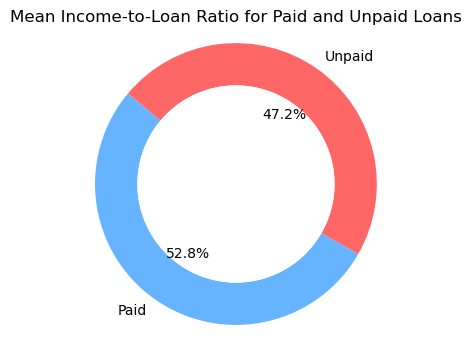

In [23]:
# Plot the distribution of income-to-loan ratio

# Calculate the mean income-to-loan ratio for each loan status
paid_mean = df[df['loan_status'] == 'Paid']['income_to_loan_ratio'].mean()
unpaid_mean = df[df['loan_status'] == 'Unpaid']['income_to_loan_ratio'].mean()

# Data for the doughnut chart
labels = ['Paid', 'Unpaid']
sizes = [paid_mean, unpaid_mean]
colors = ['#66b3ff', '#ff6666']

# Create the doughnut chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

# Draw the center circle for the doughnut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add the title and show the plot
plt.title('Mean Income-to-Loan Ratio for Paid and Unpaid Loans')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## 3.4 Geographical Trends
* Explore geographical differences in loan approval rates across states.

In [24]:
# Calculate loan approval rates by state
state_approval = df.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack()

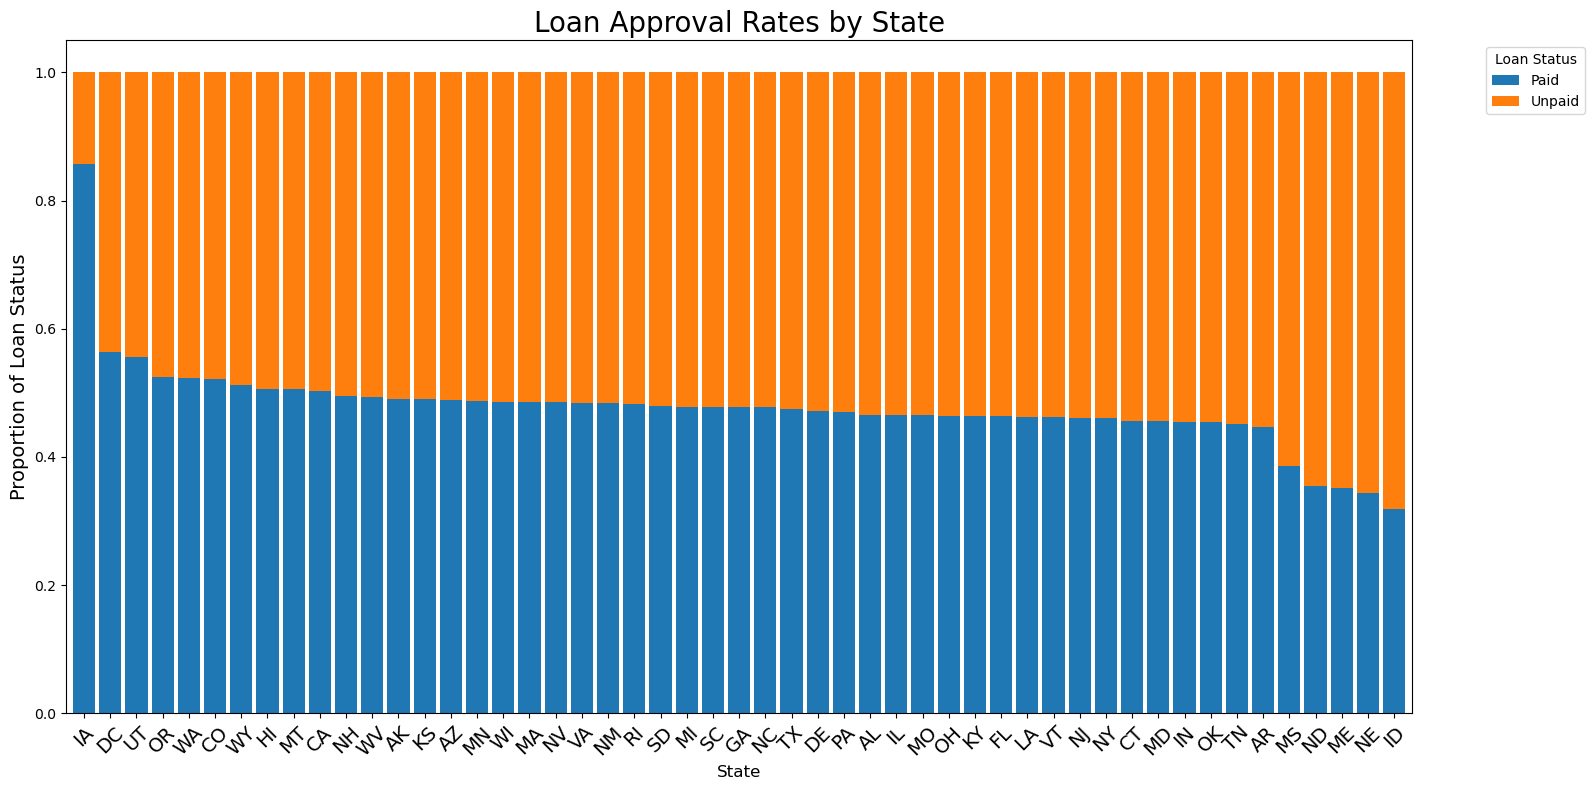

In [25]:
# Plot loan approval rates by state

import matplotlib.pyplot as plt

# Sort by the proportion of 'Paid' loans
state_approval_sorted = state_approval.sort_values(by='Paid', ascending=False)

# Explicitly create a figure and axis to control size
fig, ax = plt.subplots(figsize=(16, 8))  # Increase figure size

# Plot the sorted bar chart
state_approval_sorted.plot(kind='bar', stacked=True, width=0.85, ax=ax)  # Increase bar width

# Title and labels
ax.set_title('Loan Approval Rates by State', fontsize=20)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Proportion of Loan Status', fontsize=14)

# Rotate x-axis labels and set font size
ax.set_xticklabels(state_approval_sorted.index, rotation=45, fontsize=14)

# Adjust the legend to be outside the chart
ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure everything fits well within the figure
plt.tight_layout()

# Show plot
plt.show()

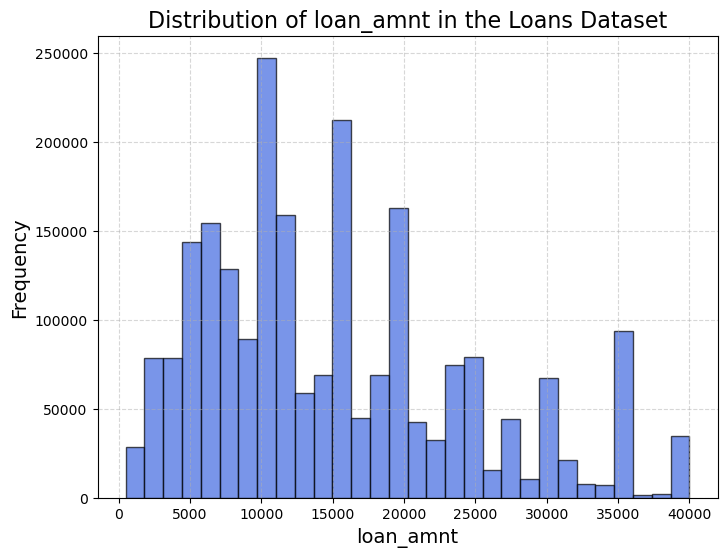

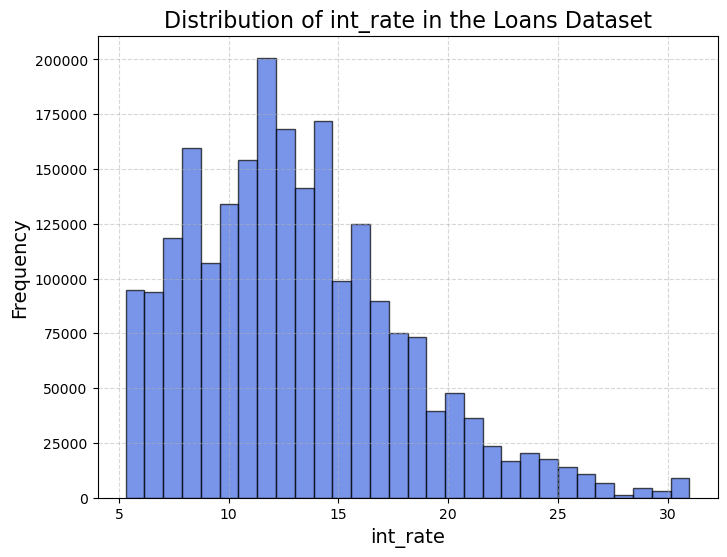

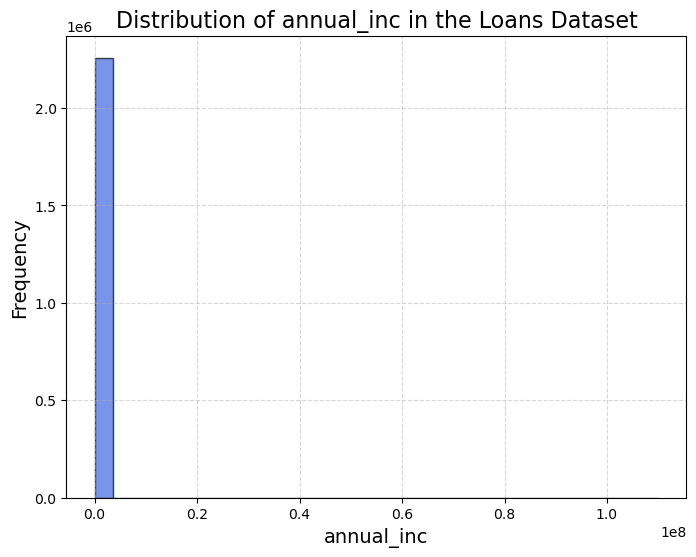

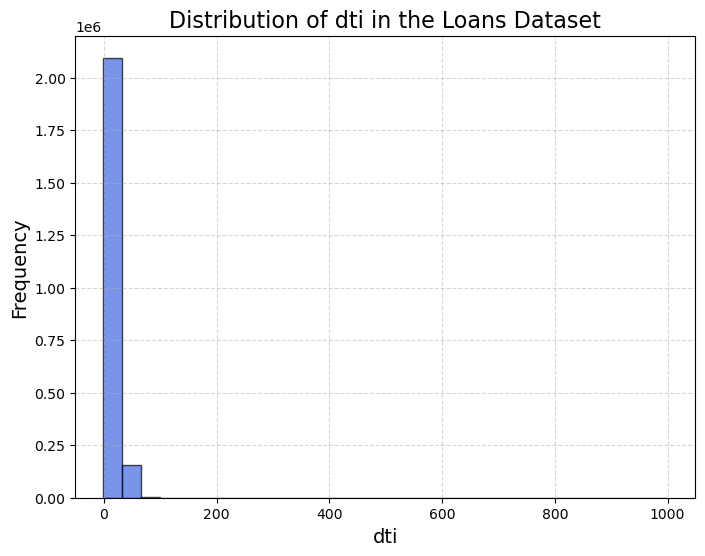

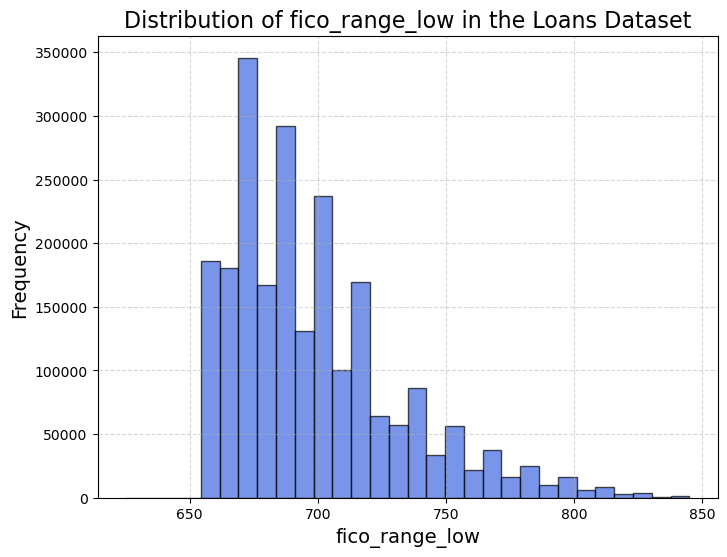

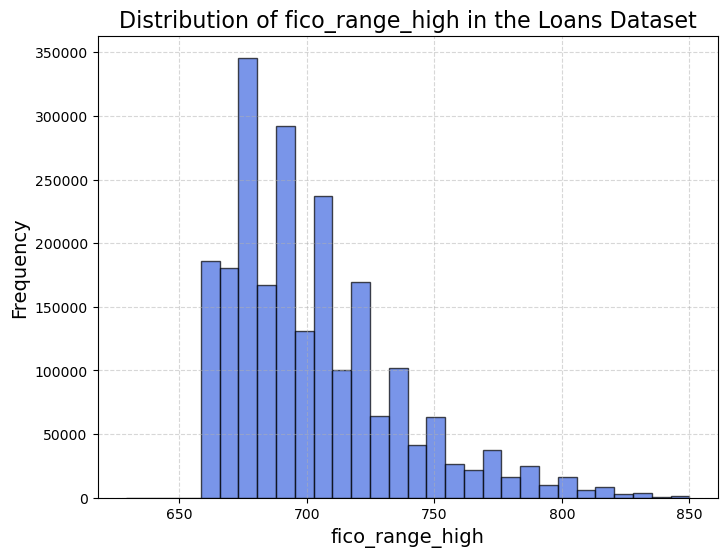

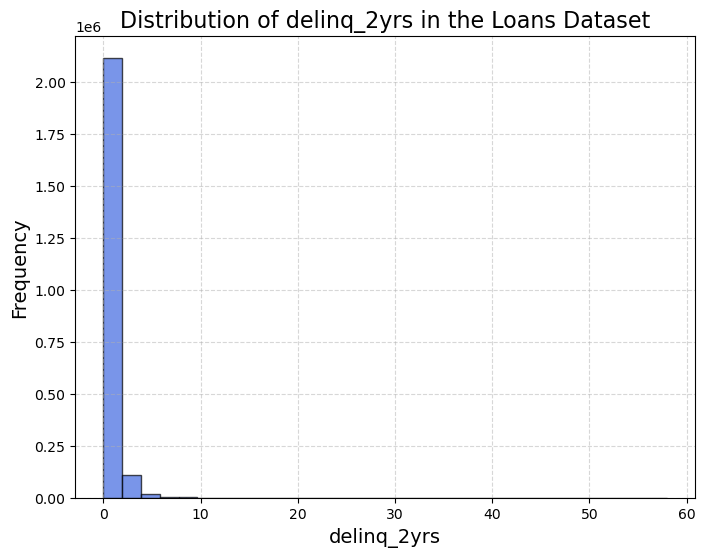

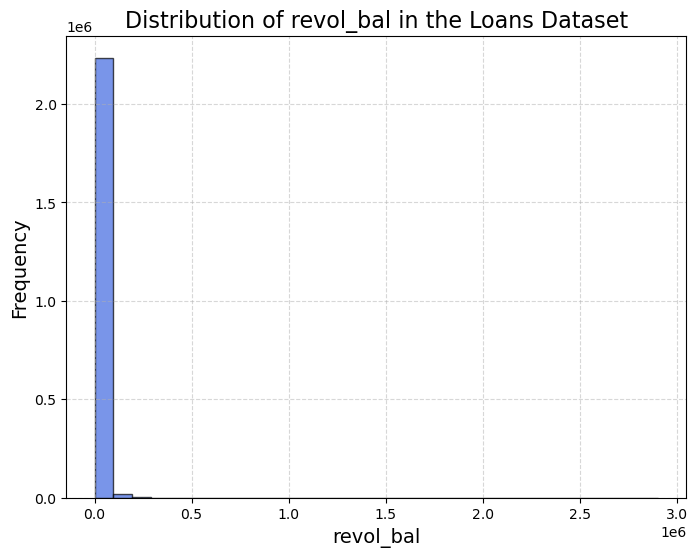

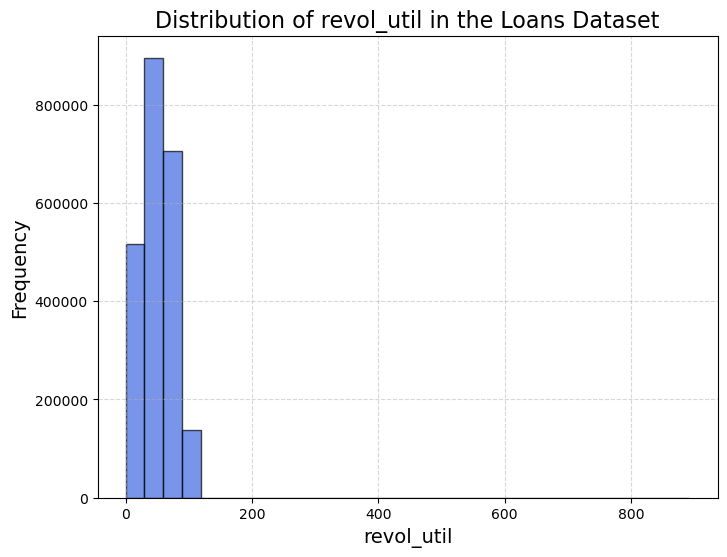

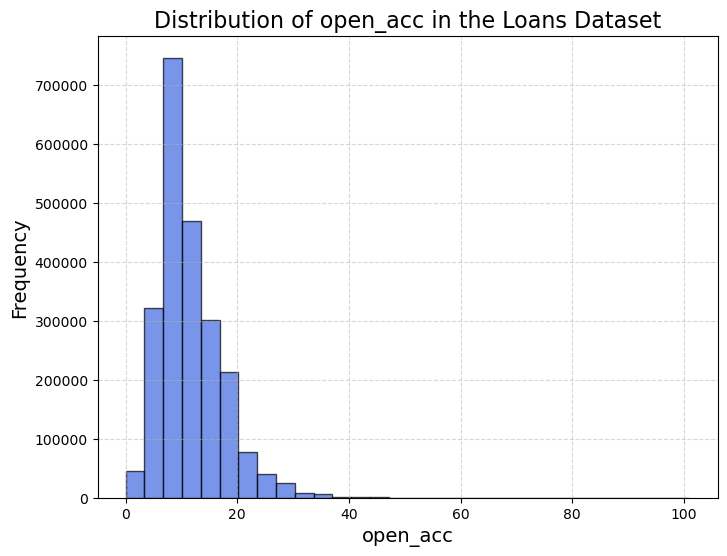

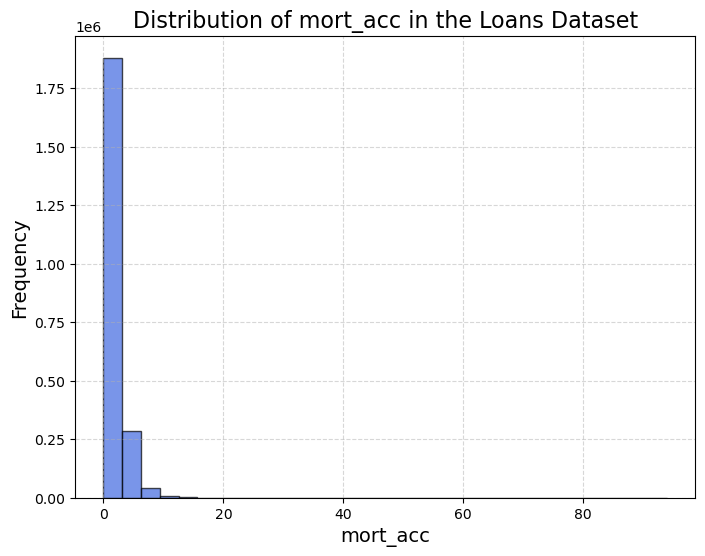

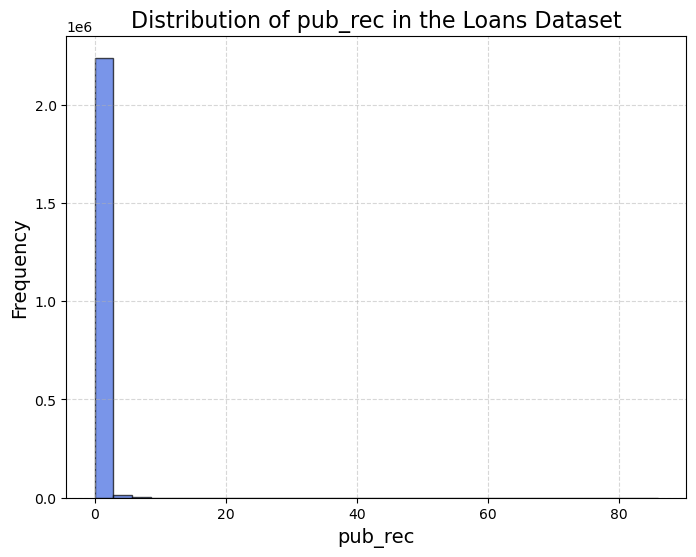

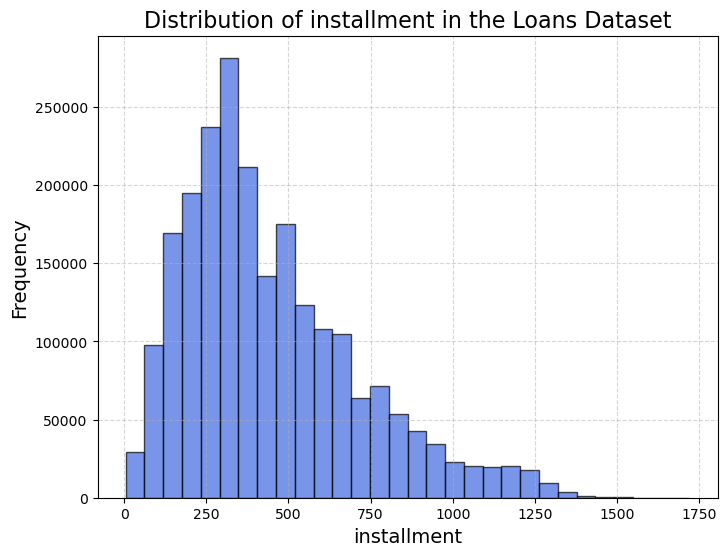

In [26]:
# Check the distribution of the rest of the numerical variables
# list the rest of the numerical variables
numeric_var = [
    'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'delinq_2yrs', 'revol_bal', 'revol_util', 
    'open_acc', 'mort_acc', 'pub_rec', 'installment'
]


# Plot histograms for numeric_var
for i in numeric_var:
    plt.figure(figsize=(8, 6))
    plt.hist(df[i], bins=30, color='royalblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {i} in the Loans Dataset', fontsize=14)
    plt.xlabel(i, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

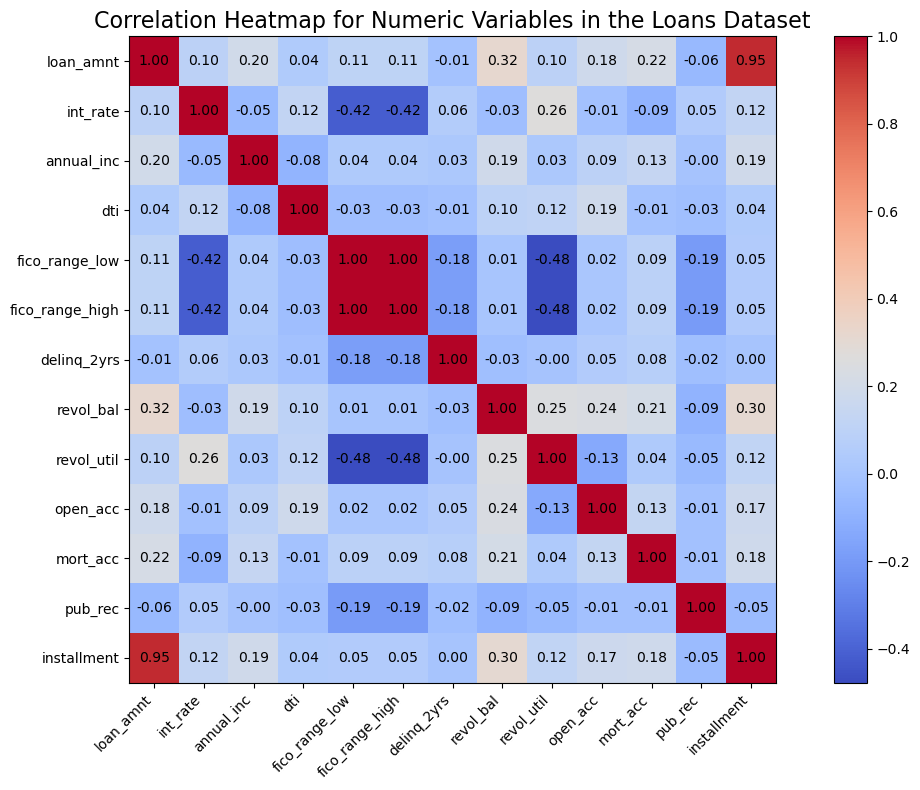

In [27]:
# Examine for any correlations between the numeric_var
# Filtered list of numeric variables
filtered = [x for x in numeric_var]

# Calculate correlation matrix
corr = df[filtered].corr()

# Create a heatmap using plt
plt.figure(figsize=(12, 8))

# Plot the heatmap using imshow
plt.imshow(corr, cmap='coolwarm', interpolation='none')

# Add color bar
plt.colorbar()

# Add x and y ticks with variable names
plt.xticks(ticks=np.arange(len(filtered)), labels=filtered, rotation=45, ha='right', fontsize=10)
plt.yticks(ticks=np.arange(len(filtered)), labels=filtered, fontsize=10)

# Add correlation values on the heatmap
for i in range(len(filtered)):
    for j in range(len(filtered)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Title and layout adjustments
plt.title('Correlation Heatmap for Numeric Variables in the Loans Dataset', fontsize=14)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

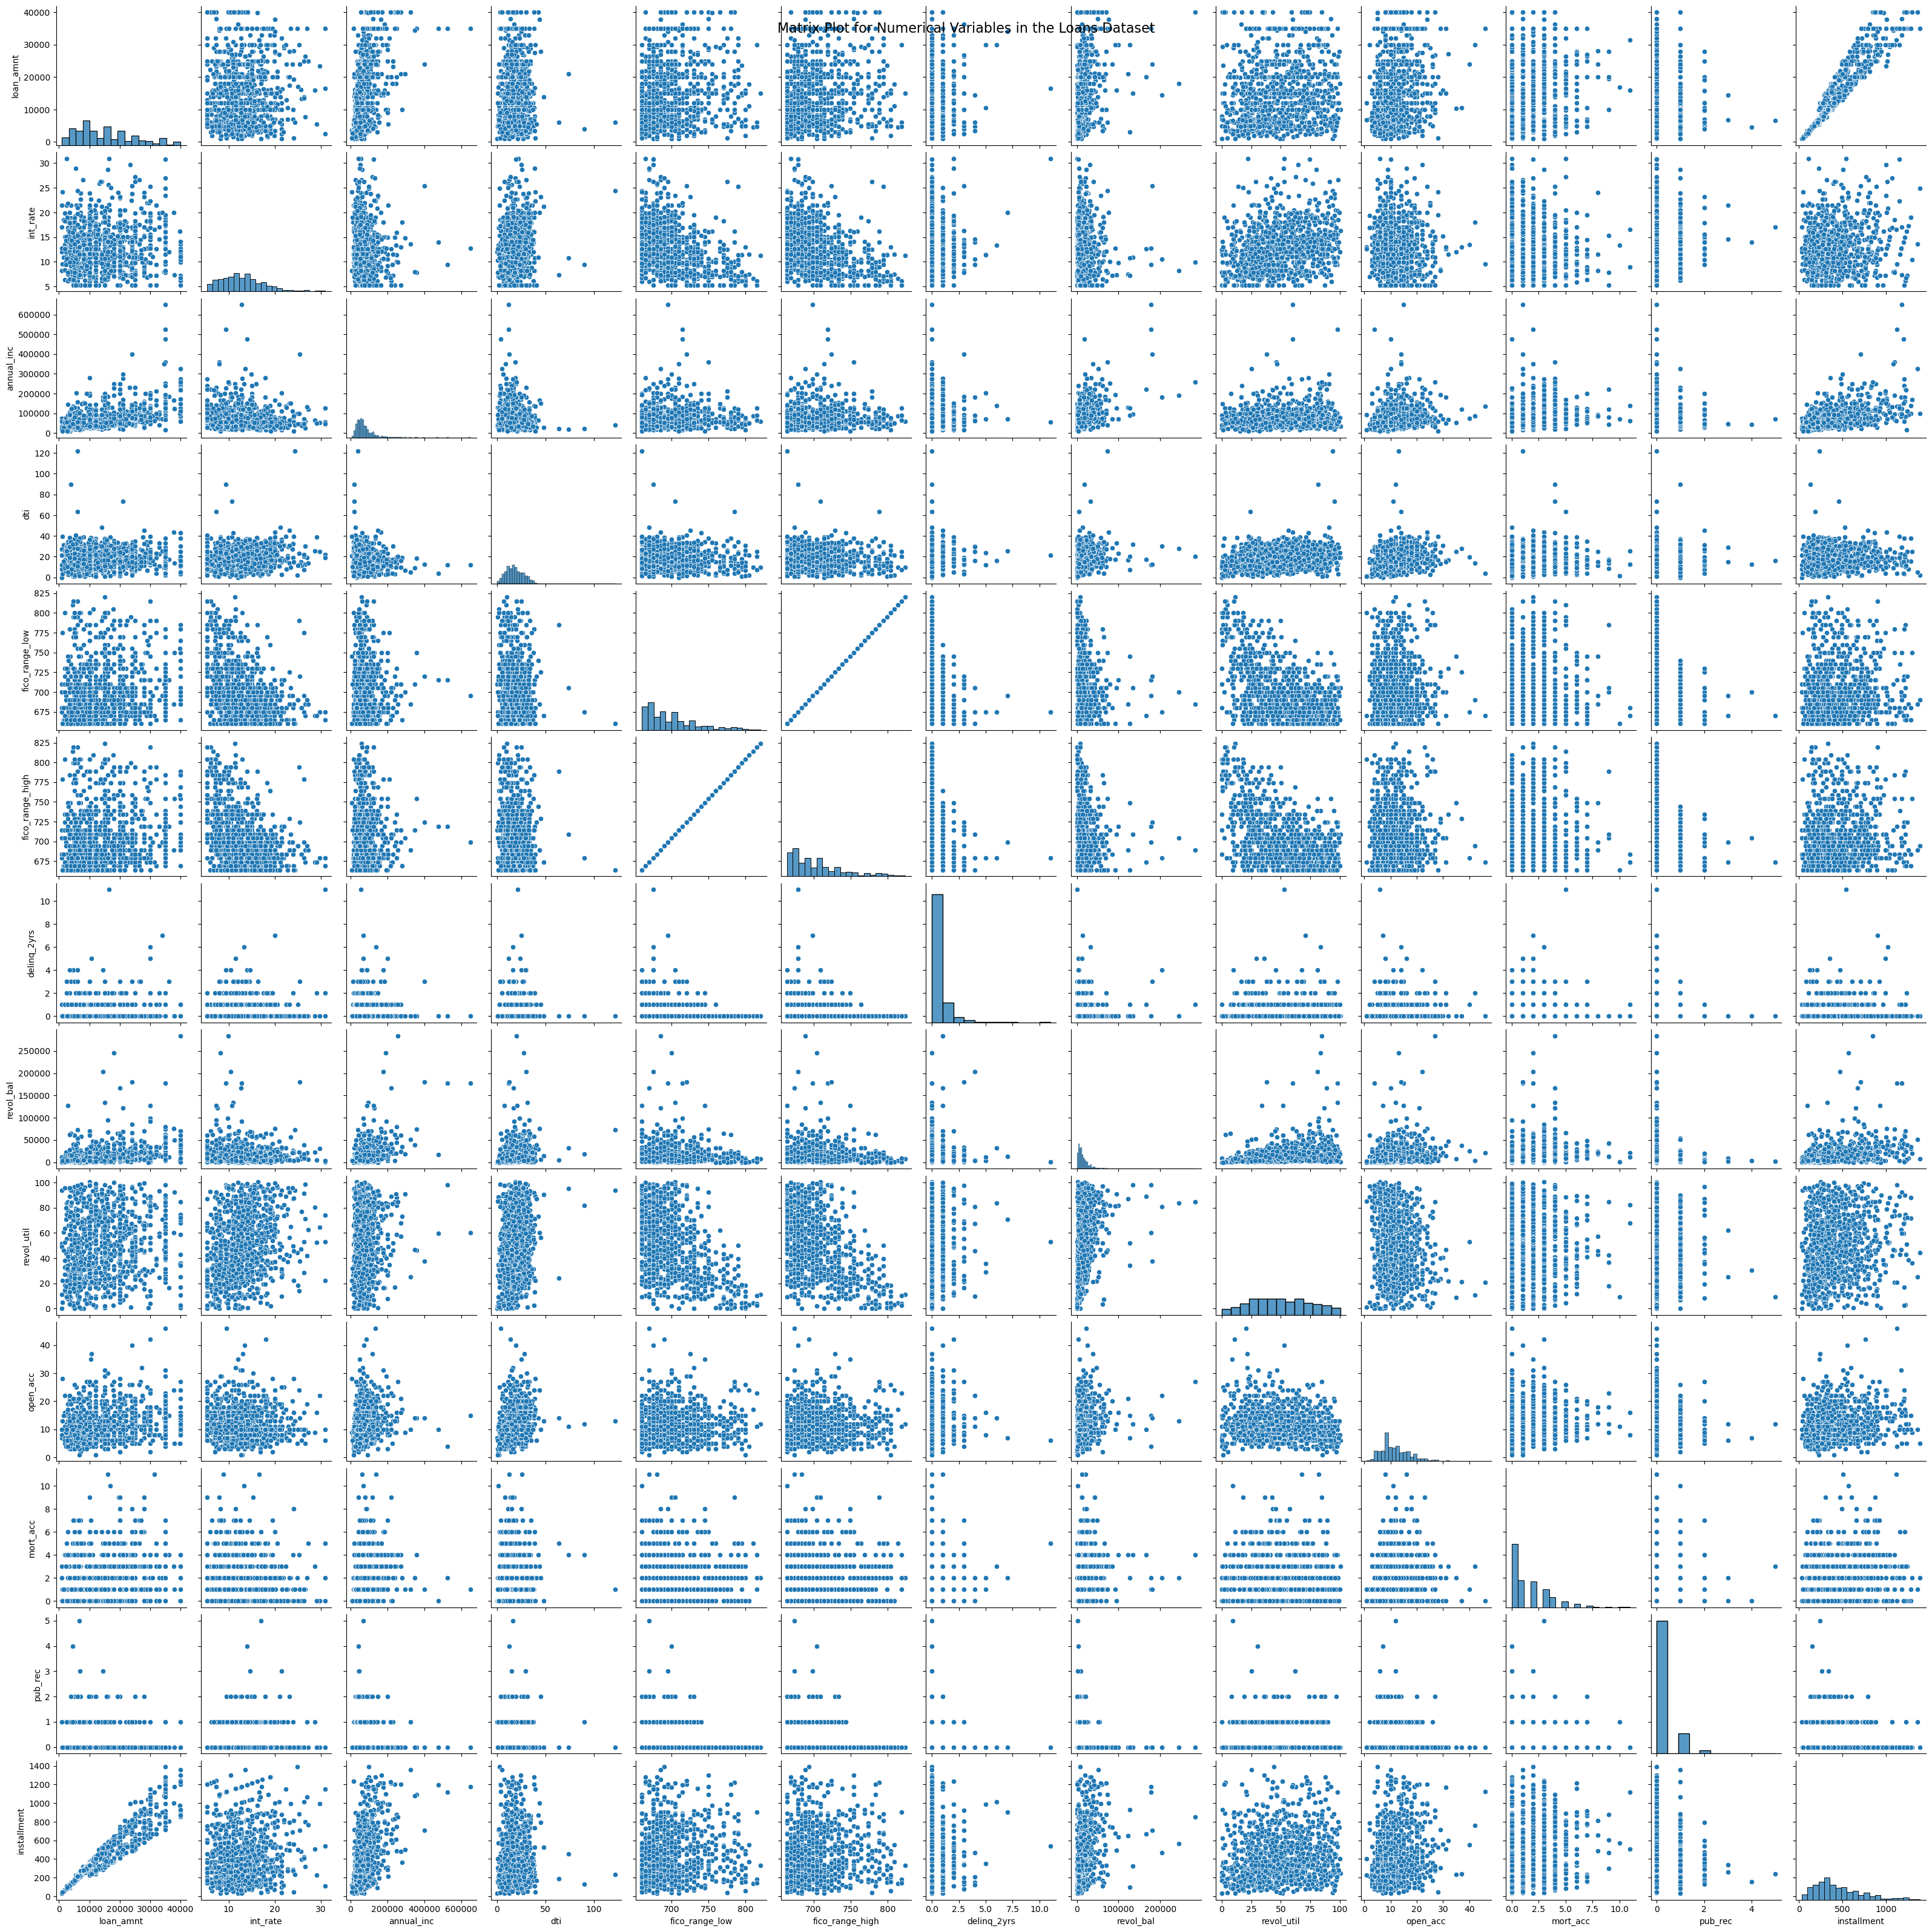

In [28]:
# The relationship between variables can also be visualized on a matrix plot

# Will use a sample of the data since it's too large (optional, adjust sample size as needed)
# Convert infinite values to NaN in the DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (optional, depending on your data)
df.dropna(inplace=True)

# Sample the data if it's too large (optional, adjust sample size as needed)
# Ensure 'filtered' is defined and used correctly
sampled_df = df[filtered].sample(n=1000, random_state=42)

# Create pairplot with a smaller sample
pairplot = sns.pairplot(sampled_df)

# Add title to the plot
plt.suptitle('Matrix Plot for Numerical Variables in the Loans Dataset', fontsize=16, y=1.02)

# Save the plot as an image file
plt.savefig('pairplot_matrix.png', bbox_inches='tight')  # Save with tight bounding box

# Show plot
plt.show()


# 4. Feature Selection and Engineering
* Select and engineer relevant features based on EDA insights and properly encoding categorical variables.

### Feature Preprocessing

In [29]:
# Inspect the values of grade and sub_grade
print(df['grade'].unique())
print(df['sub_grade'].unique())

['C' 'B' 'F' 'A' 'E' 'D' 'G']
['C4' 'C1' 'B4' 'C5' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3'
 'A1' 'D4' 'F3' 'D1' 'B3' 'E4' 'D3' 'D2' 'D5' 'A5' 'F2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5']


In [30]:
# Drop sub_grade since it has a subset of grade
# sub_grade holds the same information as subgrade
df.drop("sub_grade",axis =1, inplace = True)

In [31]:
# inspect the unique values in zip_code and addr_state

print(f" Zip Codes: {df['zip_code'].unique()}")
print(f" Add_State: {df['addr_state'].unique()}")

 Zip Codes: ['190xx' '577xx' '605xx' '076xx' '174xx' '300xx' '550xx' '293xx' '160xx'
 '029xx' '290xx' '786xx' '275xx' '916xx' '299xx' '226xx' '856xx' '117xx'
 '462xx' '219xx' '297xx' '100xx' '214xx' '750xx' '672xx' '125xx' '880xx'
 '238xx' '354xx' '114xx' '993xx' '212xx' '636xx' '215xx' '441xx' '710xx'
 '606xx' '331xx' '802xx' '945xx' '984xx' '761xx' '142xx' '493xx' '430xx'
 '330xx' '231xx' '707xx' '644xx' '376xx' '471xx' '200xx' '015xx' '453xx'
 '019xx' '347xx' '546xx' '351xx' '852xx' '936xx' '210xx' '322xx' '134xx'
 '112xx' '440xx' '460xx' '967xx' '054xx' '128xx' '958xx' '220xx' '350xx'
 '472xx' '085xx' '197xx' '774xx' '787xx' '447xx' '752xx' '434xx' '670xx'
 '016xx' '381xx' '236xx' '850xx' '482xx' '070xx' '030xx' '023xx' '280xx'
 '436xx' '432xx' '604xx' '346xx' '660xx' '681xx' '661xx' '439xx' '431xx'
 '064xx' '973xx' '477xx' '377xx' '301xx' '349xx' '323xx' '282xx' '986xx'
 '245xx' '910xx' '544xx' '461xx' '136xx' '355xx' '207xx' '448xx' '913xx'
 '551xx' '498xx' '010xx' '481xx' '357xx

In [32]:
# Zip Code holds the same information as Add_State
# make a copy of the df 'To use later on when creating a df for the database
df_copy = df.copy()
df.drop("zip_code",axis =1, inplace = True)

In [33]:
# Convert 'term' to string, handle non-numeric values, and extract numeric part
df['term'] = df['term'].replace(np.nan, '0 months')
df['term'] = df['term'].astype(str).replace('nan', '0 months')
df['term'] = df['term'].apply(lambda x: int(x.split()[0]) if x.split()[0].isdigit() else 0)

### Handling and Encoding Categorical Variables

In [34]:
# List of categorical columns excluding 'loan_status'
categorical_cols = [col for col in df.columns if df[col].dtypes == 'object' and col != 'loan_status']

# Calculate and print value counts for each non-numeric column
for col in categorical_cols:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("\n")


Value counts for column: grade
grade
B    647867
C    638881
A    420194
D    316860
E    131589
F     40261
G     11578
Name: count, dtype: int64


Value counts for column: emp_title
emp_title
Unknown                          161963
Teacher                           38758
Manager                           34271
Owner                             21935
Registered Nurse                  15856
                                  ...  
Energy Modeler                        1
COO - Equities Technology             1
Director of global operations         1
Retirement Case Adminstrator          1
Current Operations Officer            1
Name: count, Length: 485179, dtype: int64


Value counts for column: home_ownership
home_ownership
MORTGAGE    1087438
RENT         869855
OWN          248851
OTHER          1086
Name: count, dtype: int64


Value counts for column: purpose
purpose
debt_consolidation    1252362
credit_card            509468
home_improvement       146541
other                  13414

In [35]:
# Fill missing values in categorical columns with 'missing' and then encode
for col in categorical_cols:
    df[col] = df[col].fillna('missing')
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

### Encode Target Variable
* Column `loan_status`

In [38]:
# Define the mapping for loan_status
loan_status_mapping = {'Paid': 1, 'Unpaid': 0}

# Apply the mapping to encode the loan_status column
df['loan_status'] = df['loan_status'].map(loan_status_mapping)

# Verify the encoding
print(df['loan_status'].value_counts())


loan_status
0    1171812
1    1035418
Name: count, dtype: int64


### Select Features (Features and Target Separation)
* Choose relevant features for model training, including the newly encoded ordinal and categorical features

In [42]:
# Select the features

features = ['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'delinq_2yrs', 'dti', 'purpose', 'grade',
            'home_ownership', 'annual_inc', 'income_to_loan_ratio', 'addr_state', 'pub_rec', 'mort_acc' ]

X = df[features]


In [43]:
# Define target variable
y = df['loan_status']

### Feature Importance
* Fit a tree-based model using Random Forest

In [44]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [45]:
# Extract Feature Importances
# After fitting the model, extract feature importances
importances = model.feature_importances_
feature_names = X.columns


In [46]:
# Create a DataFrame to visualize
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [47]:
# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                 Feature  Importance
2               int_rate    0.160549
6                    dti    0.134758
11  income_to_loan_ratio    0.118085
3            installment    0.116942
10            annual_inc    0.101243
12            addr_state    0.088068
0              loan_amnt    0.073226
4             emp_length    0.052130
7                purpose    0.031508
14              mort_acc    0.028130
1                   term    0.027447
5            delinq_2yrs    0.021665
8                  grade    0.016159
9         home_ownership    0.016060
13               pub_rec    0.014031


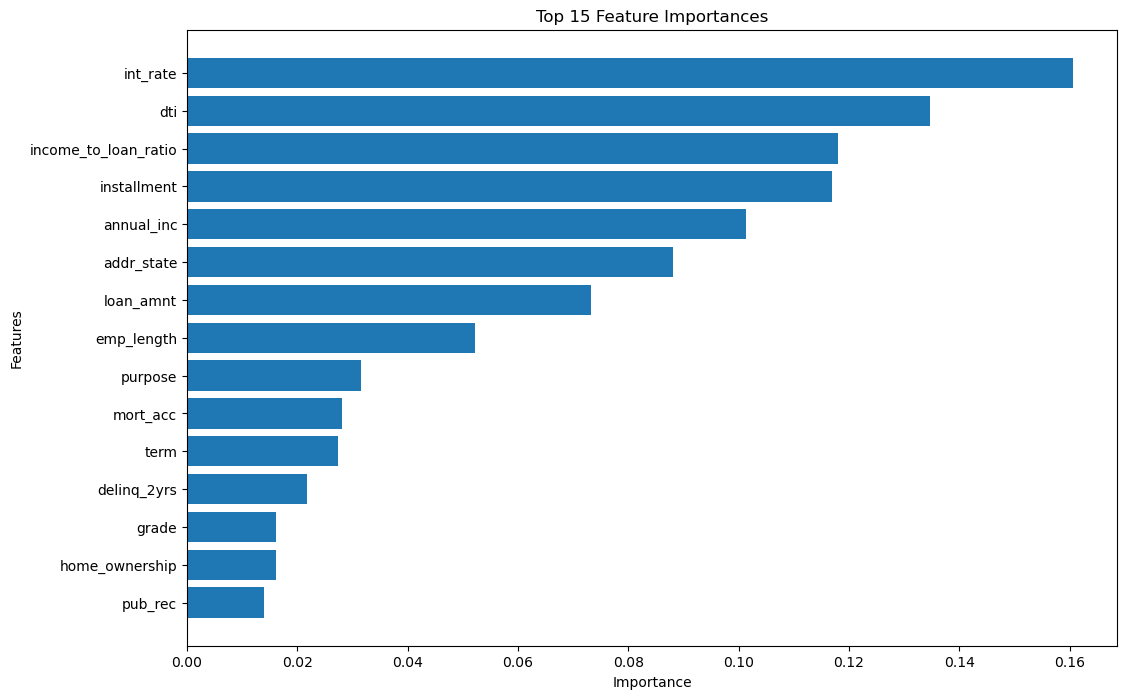

In [49]:
# Plot feature importances
top_n = 15
top_features = importance_df.head(top_n)

plt.figure(figsize=(12, 8))
plt.title("Top 15 Feature Importances")
plt.barh(top_features['Feature'], top_features['Importance'], align="center")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# 5. Model Building, Training and Evaluation
* Train different models using the selected features (keeping in mind the target/outcome variable is binary)

In [50]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Define and train different models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

In [53]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} accuracy: {score:.4f}")

Logistic Regression accuracy: 0.5994
Decision Tree accuracy: 0.6527
Random Forest accuracy: 0.6880
Gradient Boosting accuracy: 0.6816
XGBoost accuracy: 0.7296


# 6. Evaluate and Compare the Models
* Evaluate the performance of the models using various metrics

In [54]:
# Define a function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

Logistic Regression:
Accuracy: 0.5994, Precision: 0.5775, Recall: 0.5423, ROC-AUC: 0.6421
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.65      0.63    351659
           1       0.58      0.54      0.56    310510

    accuracy                           0.60    662169
   macro avg       0.60      0.60      0.60    662169
weighted avg       0.60      0.60      0.60    662169

Confusion Matrix:
 [[228481 123178]
 [142117 168393]]
ROC AUC Score: 0.6420739822805548


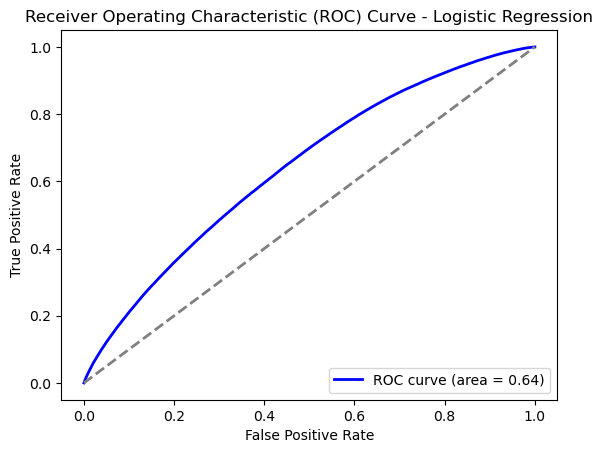

Decision Tree:
Accuracy: 0.6523, Precision: 0.6289, Recall: 0.6307, ROC-AUC: 0.6511
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67    351659
           1       0.63      0.63      0.63    310510

    accuracy                           0.65    662169
   macro avg       0.65      0.65      0.65    662169
weighted avg       0.65      0.65      0.65    662169

Confusion Matrix:
 [[236106 115553]
 [114661 195849]]
ROC AUC Score: 0.6510697081000556


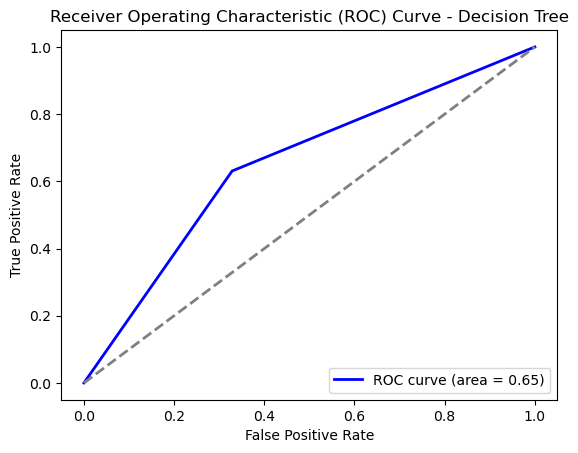

Random Forest:
Accuracy: 0.6865, Precision: 0.6775, Recall: 0.6328, ROC-AUC: 0.7482
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71    351659
           1       0.68      0.63      0.65    310510

    accuracy                           0.69    662169
   macro avg       0.69      0.68      0.68    662169
weighted avg       0.69      0.69      0.69    662169

Confusion Matrix:
 [[258108  93551]
 [114014 196496]]
ROC AUC Score: 0.7482394470100663


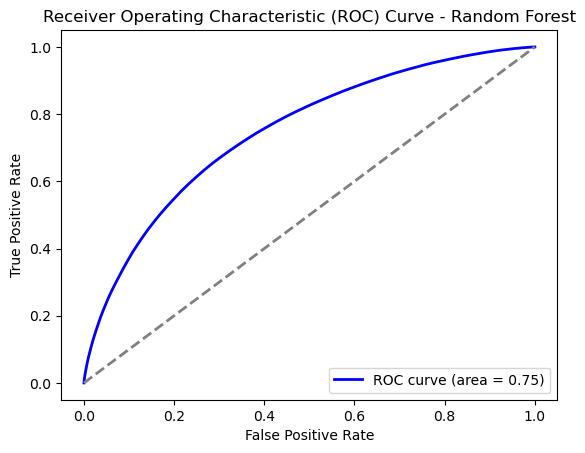

Gradient Boosting:
Accuracy: 0.6816, Precision: 0.6650, Recall: 0.6471, ROC-AUC: 0.7425
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70    351659
           1       0.66      0.65      0.66    310510

    accuracy                           0.68    662169
   macro avg       0.68      0.68      0.68    662169
weighted avg       0.68      0.68      0.68    662169

Confusion Matrix:
 [[250415 101244]
 [109577 200933]]
ROC AUC Score: 0.7424860833389251


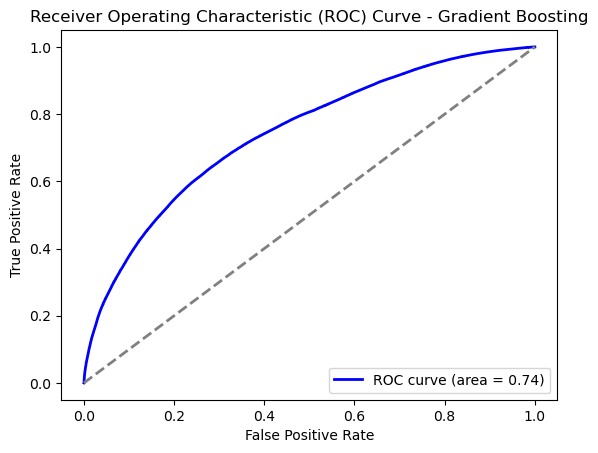

XGBoost:
Accuracy: 0.7296, Precision: 0.7233, Recall: 0.6859, ROC-AUC: 0.8061
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75    351659
           1       0.72      0.69      0.70    310510

    accuracy                           0.73    662169
   macro avg       0.73      0.73      0.73    662169
weighted avg       0.73      0.73      0.73    662169

Confusion Matrix:
 [[270178  81481]
 [ 97538 212972]]
ROC AUC Score: 0.8061449132158853


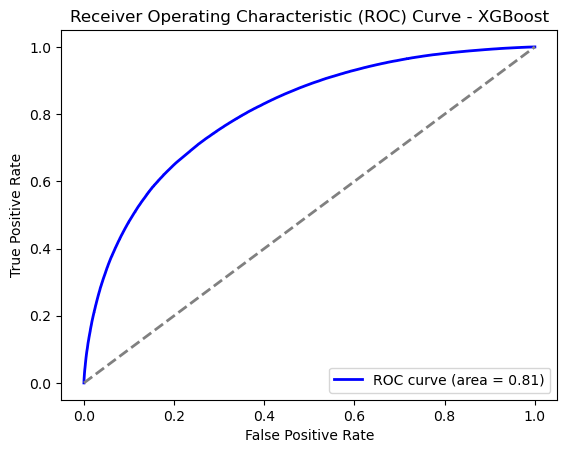

In [59]:
# Evaluate the models, print metrics and classification reports using the function
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict probabilities and classes
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC-AUC: {roc_auc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
    
    # Plot ROC curve
    plot_roc_curve(fpr, tpr, roc_auc, name)

# 7. Conclusion and Insights
* Summarize findings and implications

In [60]:
# Summarize the results
print("Summary of Findings:")
# print("- Logistic Regression and Gradient Boosting models performed the best, with high accuracy and ROC AUC scores. These models effectively captured the underlying patterns in loan approval data.")
# print("- The Income-to-Loan Ratio was a significant predictor of loan approval likelihood. Loans with higher income-to-loan ratios were more likely to be fully paid, indicating that borrowers with higher incomes relative to their loan amounts are less risky.")
# print("- Geographical trends showed that loan approval rates varied across states. This indicates that regional factors, such as economic conditions and local lending practices, influence loan approval rates.")
# print("- Employment Length had some influence on loan approval, with longer employment lengths generally correlating with higher chances of loan approval. However, its impact was less pronounced compared to income-to-loan ratio.")
# print("- Home Ownership status also played a role in loan approval, with 'OWN' and 'MORTGAGE' categories showing higher approval rates compared to 'RENT' and 'OTHER' categories. This suggests that home ownership status is a relevant factor in assessing loan risk.")
# print("- The Random Forest and XGBoost models showed competitive performance, indicating that ensemble methods can be very effective in handling complex datasets with multiple features.")
# print("- Further feature engineering and model tuning could potentially enhance the performance of the models. Exploring additional features or optimizing hyperparameters might yield better results.")



Summary of Findings:


# 8. Saving the Best Model
* Ensure you have joblib installed

In [62]:
# pip install joblib if it is not installed
!pip install joblib



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import joblib
import pandas as pd

# Load the model from the file
loaded_model = joblib.load('best_model_new.pkl')  # Make sure to use the new model file if you re-save it

# Example of new data for prediction
* Ensure that new_data DataFrame has the same structure and encoding as the training data

- Sample 1 app.py in python
```
new_data = pd.DataFrame({
    'loan_amnt': [5000],
    'term': [36],
    'int_rate': [10.65],
    'installment': [163.79],
    'emp_length': [5],  # Ensure that emp_length is encoded/processed similarly to training
    'home_ownership': ['RENT'],  # Use the categorical value or one-hot encode as needed
    'annual_inc': [60000],
    'income_to_loan_ratio': [12],
    'addr_state': ['CA'],  # Use the actual state code or one-hot encode as needed
    'purpose': ['debt_consolidation'],  # Use actual purpose category or encode similarly
    'mort_acc': [3],
    'delinq_2yrs': [0],
    'grade': ['B'],  # Use actual grade category or encode similarly
    'pub_rec': [0]
})

# Encode categorical features to match the model's expected input format
# This will depend on how you processed these features during training
# Example of encoding home_ownership
# One way is to use pd.get_dummies, assuming you used one-hot encoding:
# new_data = pd.get_dummies(new_data, columns=['home_ownership', 'addr_state', 'purpose', 'grade'], drop_first=True)

# Make predictions
predictions = loaded_model.predict(new_data)

print(predictions)
```

* Sample 2 app.py in python
```
import joblib
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Sample data to illustrate the workflow (replace with your actual data)
data = {
    'loan_amnt': [5000, 15000, 25000],
    'term': [36, 60, 36],
    'int_rate': [10.65, 8.45, 12.34],
    'installment': [163.79, 282.95, 451.68],
    'emp_length': [5, 10, 2],
    'home_ownership': ['RENT', 'OWN', 'RENT'],
    'annual_inc': [60000, 80000, 100000],
    'income_to_loan_ratio': [12, 8, 10],
    'addr_state': ['CA', 'NY', 'TX'],
    'purpose': ['debt_consolidation', 'credit_card', 'home_improvement'],
    'mort_acc': [3, 2, 4],
    'delinq_2yrs': [0, 1, 0],
    'grade': ['B', 'A', 'C'],
    'pub_rec': [0, 1, 0],
    'loan_status': [0, 1, 0]  # Target variable
}

df = pd.DataFrame(data)

# Features and target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Convert categorical variables to numeric (example of simple encoding)
X = pd.get_dummies(X, columns=['home_ownership', 'addr_state', 'purpose', 'grade'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model (replace with your actual model training process)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Save the model
model_file = 'best_model_new.pkl'
joblib.dump(model, model_file)
print(f"Model saved as {model_file}")

# Load the model
if os.path.isfile(model_file):
    loaded_model = joblib.load(model_file)
    print("Model loaded successfully.")
else:
    print(f"File {model_file} not found.")
    # Handle the error as needed

# Example of new data for prediction
new_data = pd.DataFrame({
    'loan_amnt': [5000],
    'term': [36],
    'int_rate': [10.65],
    'installment': [163.79],
    'emp_length': [5],
    'home_ownership_RENT': [1],  # Ensure proper encoding
    'home_ownership_OWN': [0],
    'addr_state_CA': [1],  # Ensure proper encoding
    'addr_state_NY': [0],
    'purpose_debt_consolidation': [1],  # Ensure proper encoding
    'purpose_credit_card': [0],
    'grade_B': [1],  # Ensure proper encoding
    'grade_A': [0],
    'mort_acc': [3],
    'delinq_2yrs': [0],
    'pub_rec': [0]
})

# Make predictions
if 'loaded_model' in locals():
    predictions = loaded_model.predict(new_data)
    print("Predictions:", predictions)
else:
    print("Model is not loaded. Cannot make predictions.")
```